In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

seaborn.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [2]:
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="1-1-1926")[0]
factors.head()

C:\Users\User\AppData\Local\Temp\ipykernel_21108\1924419770.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="1-1-1926")[0]
C:\Users\User\AppData\Local\Temp\ipykernel_21108\1924419770.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = pdr.get_data_famafrench("F-F_Research_Data_Factors", start="1-1-1926")[0]


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31


In [3]:
industries = pdr.get_data_famafrench("10_Industry_Portfolios", start="1-1-1926")[0]
industries.head()

C:\Users\User\AppData\Local\Temp\ipykernel_21108\268191425.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industries = pdr.get_data_famafrench("10_Industry_Portfolios", start="1-1-1926")[0]
C:\Users\User\AppData\Local\Temp\ipykernel_21108\268191425.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industries = pdr.get_data_famafrench("10_Industry_Portfolios", start="1-1-1926")[0]
C:\Users\User\AppData\Local\Temp\ipykernel_21108\268191425.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industries = pdr.get_data_famafren

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.13
1926-08,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.35
1926-09,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
1926-10,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.84
1926-11,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11


In [4]:
endog = industries.HiTec - factors.RF.values
exog = sm.add_constant(factors["Mkt-RF"])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
params = rres.params.copy()
params.index = np.arange(1, params.shape[0] + 1)
params.head()

,const,Mkt-RF
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


In [5]:
params.iloc[57:62]


,const,Mkt-RF
58,NaN,NaN
59,NaN,NaN
60,0.876155,1.399240
61,0.879936,1.406578
62,0.953169,1.408826


In [6]:
params.tail()


,const,Mkt-RF
1170,0.528675,1.095787
1171,0.558209,1.098240
1172,0.533072,1.095706
1173,0.476558,1.094137
1174,0.459747,1.093485


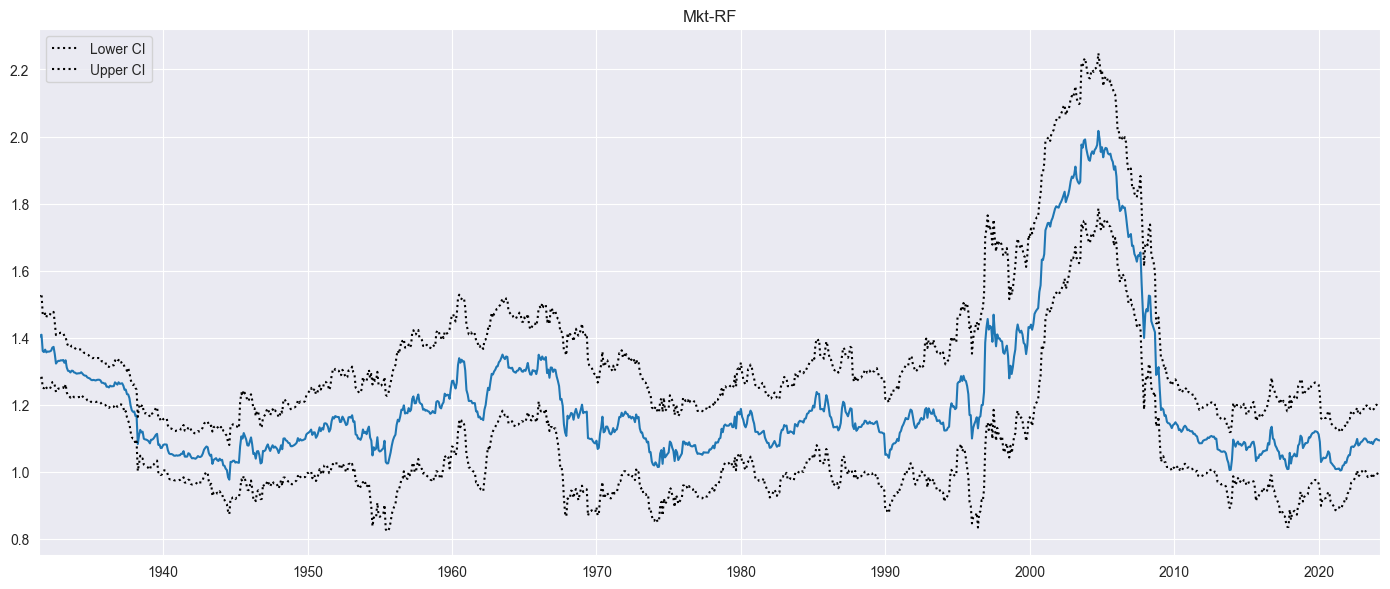

In [7]:
fig = rres.plot_recursive_coefficient(variables=["Mkt-RF"], figsize=(14, 6))


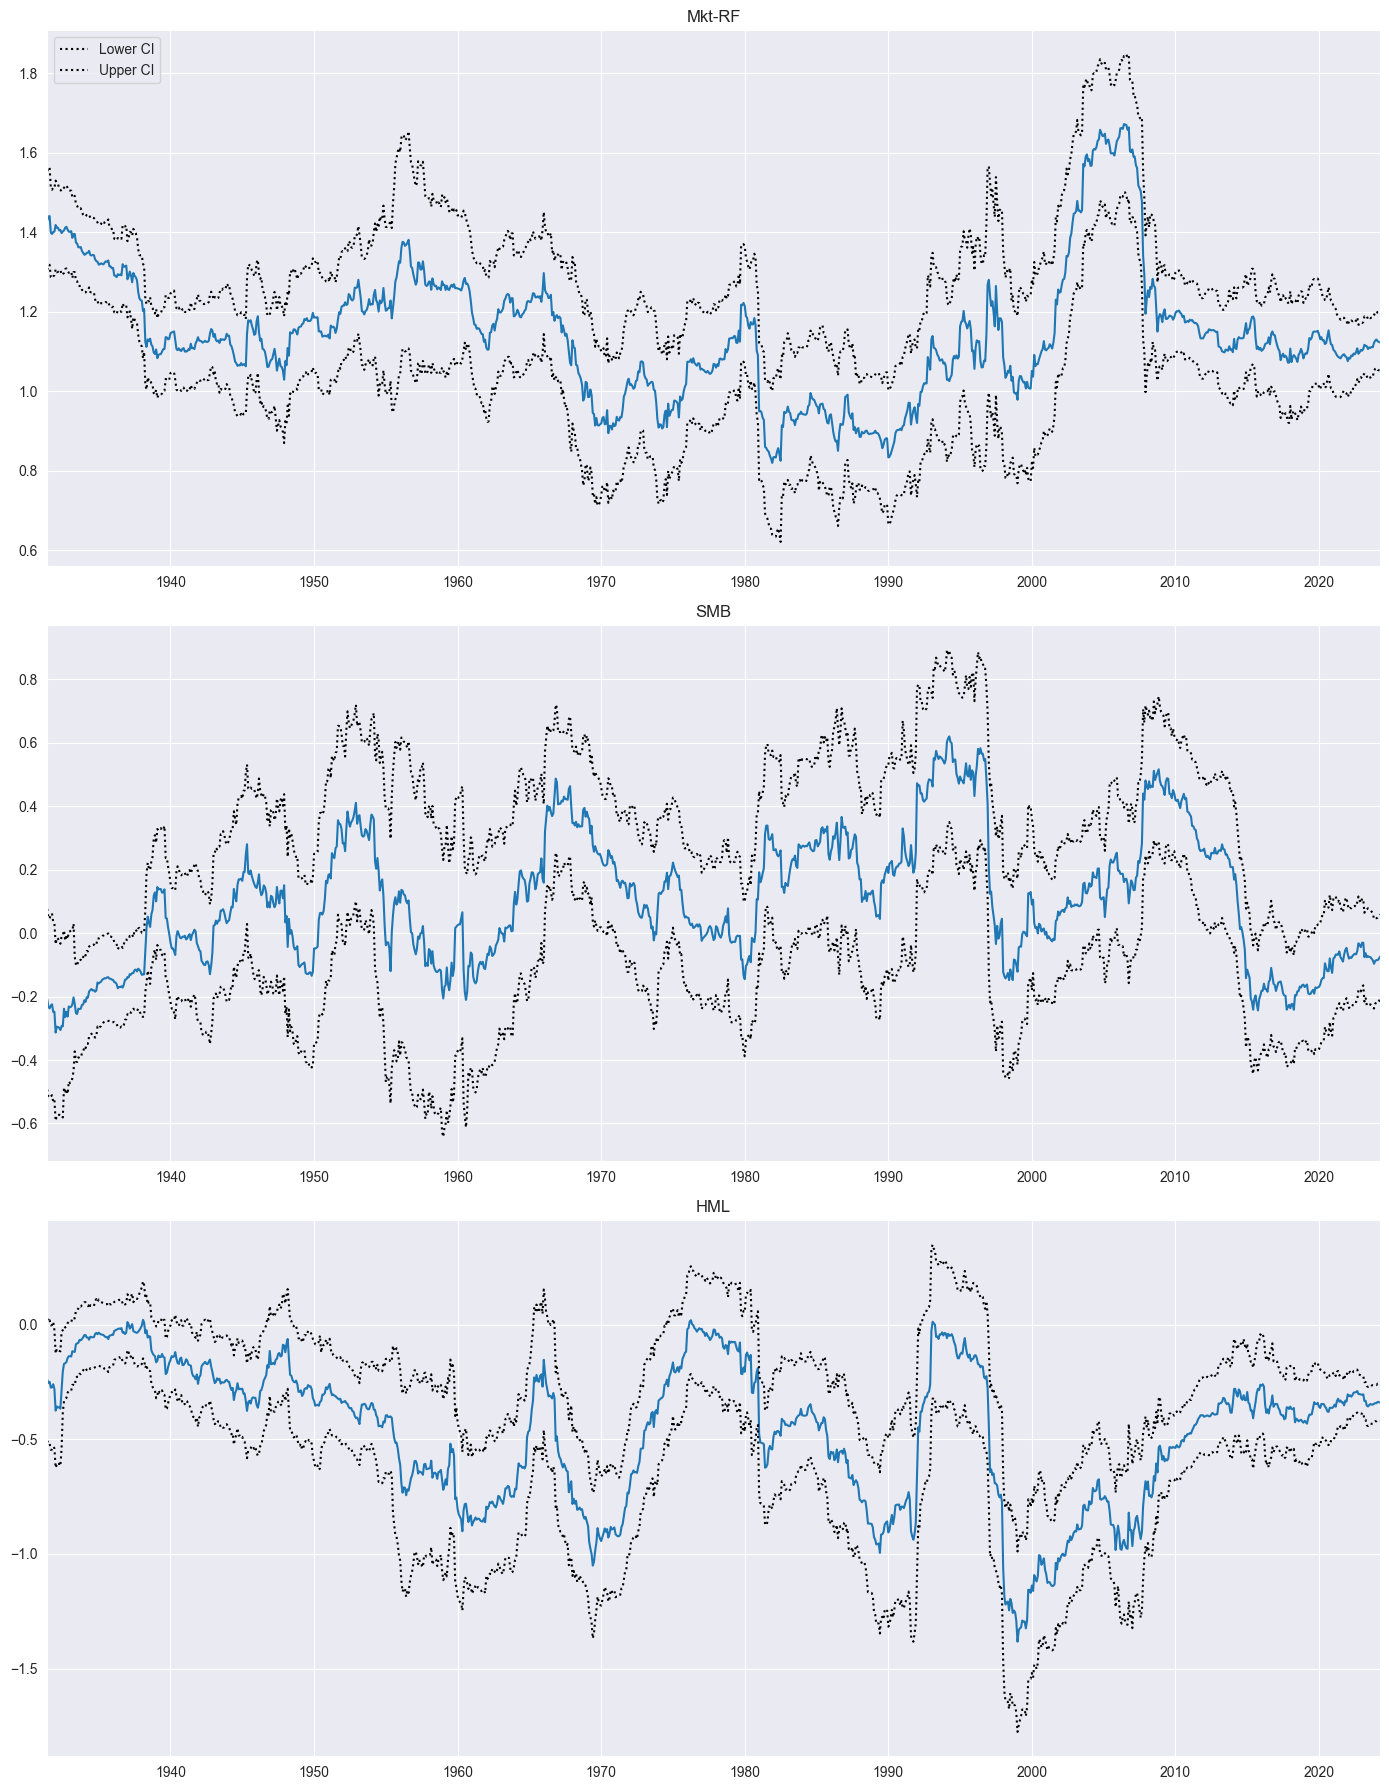

In [8]:
exog_vars = ["Mkt-RF", "SMB", "HML"]
exog = sm.add_constant(factors[exog_vars])
rols = RollingOLS(endog, exog, window=60)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))

In [9]:
joined = pd.concat([factors, industries], axis=1)
joined["Mkt_RF"] = joined["Mkt-RF"]
mod = RollingOLS.from_formula("HiTec ~ Mkt_RF + SMB + HML", data=joined, window=60)
rres = mod.fit()
rres.params.tail()

,Intercept,Mkt_RF,SMB,HML
Date,,,,
2023-12,0.622915,1.127724,-0.092094,-0.345798
2024-01,0.636804,1.130713,-0.092752,-0.346781
2024-02,0.608402,1.126655,-0.093396,-0.341693
2024-03,0.602830,1.126098,-0.091052,-0.341573
2024-04,0.582392,1.123255,-0.084592,-0.343758
